In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Load Datasets

## load Project Sunroof Data
sr_data = pd.read_csv("data/project-sunroof-census_tract.csv", index_col="region_name")
sr_data = sr_data.rename_axis(index={"region_name": "GEOID"})
sr_data.index = sr_data.index.astype(int)
#print(sr_data.head(5))

#load Energy Equity Project Data
eep_data = pd.read_csv("data/eep_final_data.csv", index_col="GEOID")
eep_data.index = eep_data.index.astype(int)
#print(eep_data.head(5))

#load Justice40 Data
j40_data = pd.read_csv("data/1.0-communities.csv", index_col="Census tract 2010 ID")
j40_data = j40_data.rename_axis(index={"Census tract 2010 ID": "GEOID"})
j40_data.index = j40_data.index.astype(int)
#print(j40_data.head(5))

#load Opportunity Zone Data
oz_data = pd.read_csv("data/Opportunity_Zone_ExportTable1.csv", index_col="Tract_Boundaries_ID")
oz_data = oz_data.rename_axis(index={"Tract_Boundaries_ID": "GEOID"})
oz_data.index = oz_data.index.astype(int)
#print(oz_data.head(5))

#load REPLICA data
replica_data = pd.read_csv("data/seeds_ii_replica.csv", index_col="geoid")
replica_data = replica_data.rename_axis(index={"geoid": "GEOID"})
replica_data.index = replica_data.index.astype(int)
#print(oz_data.head(5))

/var/folders/67/r87g720s2653g554zdhtz1vh0000gn/T/ipykernel_51738/3391262701.py:15: DtypeWarning: Columns (18,26,70,72,85,131) have mixed types. Specify dtype option on import or set low_memory=False.
  j40_data = pd.read_csv("data/1.0-communities.csv", index_col="Census tract 2010 ID")
/var/folders/67/r87g720s2653g554zdhtz1vh0000gn/T/ipykernel_51738/3391262701.py:27: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  replica_data = pd.read_csv("data/seeds_ii_replica.csv", index_col="geoid")


In [14]:
#Qucik sanity check
## load solar adoption data
adoption_data = pd.read_csv('data/solar_demographic_tract_level_data.csv', index_col=0)
adoption_data = adoption_data.rename(columns={"tract": "GEOID"})
print(adoption_data.head)

combined_data = adoption_data.merge(sr_data, left_on='GEOID', right_index=True)
print("# of Census Tracts: "+str(len(combined_data['GEOID'].unique())))


<bound method NDFrame.head of          year        GEOID               bin_description   pct   N
1        2020   4005000100             Income bin: <$50k   0.0   0
2        2020   4005000100          Income bin: $50-100k  30.0   3
3        2020   4005000100         Income bin: $100-150k  30.0   3
4        2020   4005000100       Income bin: $150k-$200k  30.0   3
5        2020   4005000100         Income bin: $200-250k  10.0   1
...       ...          ...                           ...   ...  ..
1909852  2019  55133201505     % of Poverty Level: <150%   4.8   1
1909853  2019  55133201505  % of Poverty Level: 150-200%   0.0   0
1909854  2019  55133201505  % of Poverty Level: 200-250%   0.0   0
1909855  2019  55133201505  % of Poverty Level: 250-300%   0.0   0
1909856  2019  55133201505     % of Poverty Level: >300%  95.2  20

[1909856 rows x 5 columns]>
# of Census Tracts: 14724


In [28]:
#Load Geospatial Dataset

#load Energy Equity Project geojson for geometry
eep_geodata = gpd.read_file("data/eep_final_simplified.json")

# #load state boundaries file
# state_geodata = gpd.read_file("data/tl_2010_us_state10.shx")

In [29]:
#Extract GEOID and Geometry to join into other datasets later
tracts_geoid = eep_geodata[["GEOID", "geometry"]]
tracts_geoid = tracts_geoid.set_index("GEOID")
tracts_geoid.index = tracts_geoid.index.astype(int)

In [41]:
#Get shape of datasets, check for duplicates and missing data
print("Project Sunroof Data Points:")
print(sr_data.shape)
print("Project Sunroof Duplicate Points:")
print(sr_data.index.duplicated(keep=False).sum())
print(sr_data.isna().sum())

print("Energy Equity Data Points:")
print(eep_data.shape)
print("Energy Equity Duplicate Points:")
print(eep_data.index.duplicated(keep=False).sum())
print(eep_data.isna().sum())

print("Justice 40 Data Points:")
print(j40_data.shape)
print("Justice 40 Duplicate Points:")
print(j40_data.index.duplicated(keep=False).sum())
#print(j40_data.isna().sum())

print("REPLICA Data Points:")
print(replica_data.shape)
print("REPLICA Duplicate Points:")
print(replica_data.index.duplicated(keep=False).sum())
#print(replica_data.isna().sum())

Project Sunroof Data Points:
(56940, 30)
Project Sunroof Duplicate Points:
8702
state_name                                 0
lat_max                                    0
lat_min                                    0
lng_max                                    0
lng_min                                    0
lat_avg                                    0
lng_avg                                    0
yearly_sunlight_kwh_kw_threshold_avg    4348
count_qualified                            0
percent_covered                            0
percent_qualified                          0
number_of_panels_n                         0
number_of_panels_s                         0
number_of_panels_e                         0
number_of_panels_w                         0
number_of_panels_f                         0
number_of_panels_median                   25
number_of_panels_total                  4371
kw_median                                 25
kw_total                                4371
yearly_sunlight_kwh_

In [42]:
#Clean Data

## Clean EEP Data ##
# Create a boolean mask to filter out 
# 1) energy_burden data points at or above 100%
energy_burden_mask =  (eep_data['energy_burden'] < 100) & (eep_data['energy_burden'] >= 0)
# Filter the DataFrame using the boolean masks
cleaned_eep_data = eep_data[energy_burden_mask]

print("Cleaned EEP Data Points:")
print(eep_data.shape)
print(cleaned_eep_data.shape)


## Clean Project Sunroof Data ##
## Sort the DataFrame by 'yearly_sunlight_kwh_kw_threshold_avg' in ascending order
# Empty or zero values will be placed at the bottom
sorted_data = sr_data.sort_values('yearly_sunlight_kwh_kw_threshold_avg', ascending=True, na_position='last')

# Remove duplicate rows without much data (which will be the second occurance)
cleaned_sr_data = sorted_data[~sorted_data.index.duplicated(keep='first')]

print("Project Sunroof Data Points w Duplicates Removed:")
print(cleaned_sr_data.shape)

# Create a boolean mask to filter out 
# 2) kw_median, yearly_sunlight_kwh_median, yearly_sunlight_kwh_total with negative values
solar_potential_mask = (cleaned_sr_data['kw_median'] >= 0) & (cleaned_sr_data['yearly_sunlight_kwh_median'] >= 0) & (cleaned_sr_data['yearly_sunlight_kwh_total'] >= 0)
cleaned_sr_data = cleaned_sr_data[solar_potential_mask]

print("Project Sunroof Data Points w Negatives Removed:")
print(cleaned_sr_data.shape)

Cleaned EEP Data Points:
(83548, 43)
(60448, 43)
Project Sunroof Data Points w Duplicates Removed:
(52589, 30)
Project Sunroof Data Points w Negatives Removed:
(52564, 30)


In [43]:
#Get count of Urban (including suburban) Tracts from REPLICA dataset (where do they get the data from??)
urban_locales = ["City - Large", "City - Midsize", "City - Small", "Suburban - Large", "Suburban - Midsize", "Suburban - Small"]
urban_tracts = replica_data[replica_data["locale"].isin(urban_locales)]
print(urban_tracts.shape)

(47128, 219)


In [16]:
# Create Category 1 Dataset for Main Criteria 
# based on 45D(e) Internal Revenue Service Guidelines 
# which defines "low-income community" census tracts where: 
# 1) Poverty rate > 20% OR 
# 2) Median family income <= 80% of statewide MFI

# Create a new column 'qualified' and initialize it with False
oz_data['qualified'] = False

columns_to_convert = ['Poverty_csv_Percent_below_pover', 'MedianFamilyIncome_csv_Median_F', 'State_MedFamInc', 'Metro_MedFamInc']

# Convert selected columns to float, ignoring non-numeric values
oz_data[columns_to_convert] = oz_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')


# Set 'qualified' if poverty percentage is >= 20
oz_data.loc[oz_data['Poverty_csv_Percent_below_pover'] >= 20, 'qualified'] = True

# Set 'qualified' if tract is in metro area and median family income does not exceed 
# the greater of 80% statewide median family income and 80% metropolitan area median family income
oz_data.loc[(oz_data['Tract_by_Metro_Area_csv_class'] == "Metro") & 
             (oz_data['MedianFamilyIncome_csv_Median_F'] < oz_data[['State_MedFamInc', 'Metro_MedFamInc']].max(axis=1)), 'qualified'] = True

# Set 'qualified' if tract not in a metro area and median family income does not exceed 80% statewide median family income
oz_data.loc[(oz_data['Tract_by_Metro_Area_csv_class'] != "Metro") & 
             (oz_data['MedianFamilyIncome_csv_Median_F'] < 0.8*oz_data['State_MedFamInc']), 'qualified'] = True

oz_data_qualified = oz_data.loc[oz_data["qualified"] == True][['qualified']]
print(oz_data_qualified.shape)

combined_data = adoption_data.merge(oz_data_qualified, left_on='GEOID', right_index=True)
print("# of Census Tracts: "+str(len(combined_data['GEOID'].unique())))

(41521, 1)
# of Census Tracts: 7949


In [26]:
#Comparing Datasets
#Difference Between J40 (has official census tract count) and EEP (has more) 
# - where are the extra census tracts coming from?
extra_tracts = eep_data[eep_data.index.isin(j40_data.index) == False]
na_eep_tracts = eep_data[eep_data["energy_burden"].isna()]
print(extra_tracts.shape)
print(na_eep_tracts.shape)
print(extra_tracts.merge(na_eep_tracts,left_index=True, right_index=True).shape)

#How many of the Category 1 eligible datasets are urban/suburban?
eligible_urban = oz_data_qualified.merge(urban_tracts, left_index=True, right_index=True)
print(eligible_urban.shape)

(22533, 43)
(23098, 43)
(22516, 86)
(28287, 220)


In [47]:
#Merge datasets
sr_selected_cols = cleaned_sr_data[['percent_covered', 'number_of_panels_total', 'number_of_panels_median', 'kw_median', 'kw_total', 
                            'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total', 'carbon_offset_metric_tons', 'existing_installs_count']]

eep_selected_cols = cleaned_eep_data[['STATE_NAME', 'energy_burden', 'num_solar_installers', 'median_income_solar', 'total_pop', 'year_built', 
                              'total_households', 'median_income', 'owner_occupied', 'renter_occupied', 'bipoc_percent', 'community_power_score']]

j40_selected_cols = j40_data[['Total population', 'Percent of individuals below 200% Federal Poverty Line (percentile)', 'Percent of individuals below 200% Federal Poverty Line',
'PM2.5 in the air (percentile)', 'PM2.5 in the air', 'Current asthma among adults aged greater than or equal to 18 years', 'Housing burden (percent)', 
                              'Unemployment (percent) (percentile)', 'Unemployment (percent)', 'Energy burden (percentile)']]

merged_data = pd.merge(sr_selected_cols, eep_selected_cols, left_index=True, right_index=True)
merged_data = merged_data.merge(j40_selected_cols, left_index=True, right_index=True )
merged_data = merged_data.merge(oz_data_qualified, left_index=True, right_index=True )

# #Shorten column names
# merged_data = merged_data.rename_columns(columns={"Percent of individuals below 200% Federal Poverty Line (percentile)": "low_income_households",
# 'PM2.5 in the air (percentile)': 'pm25_percentile', 'Current asthma among adults aged greater than or equal to 18 years': 'asthma_incidence', 
# 'Housing burden (percent)': 'housing_burden', 'Unemployment (percent) (percentile)': 'unemployment_percentile'})


print(merged_data.shape)

(25850, 32)


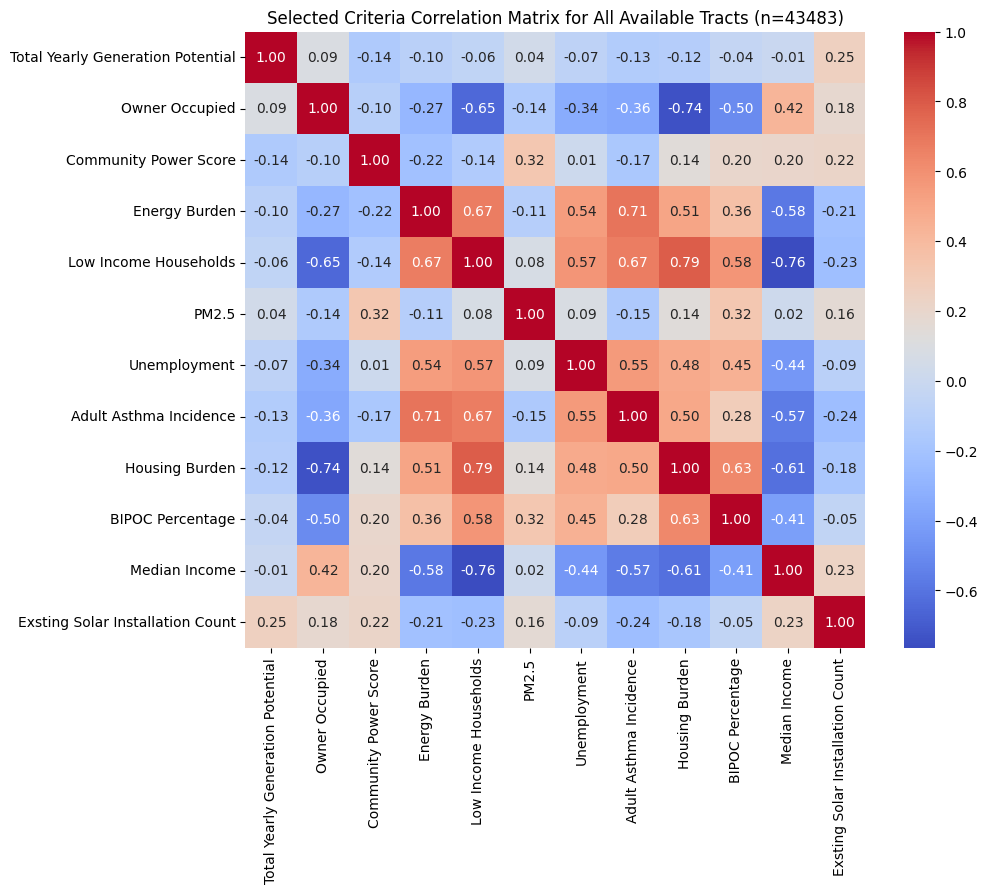

In [46]:
#Correlation Matrix
criteria = ['yearly_sunlight_kwh_total', 'owner_occupied', 'community_power_score', 
             'energy_burden', 'Percent of individuals below 200% Federal Poverty Line',
             'PM2.5 in the air', 'Unemployment (percent)', 
             'Current asthma among adults aged greater than or equal to 18 years']

comparison_criteria = ['Housing burden (percent)', "bipoc_percent", "median_income", "existing_installs_count"]

correlation_matrix = merged_data[criteria + comparison_criteria].corr()
labels = ['Total Yearly Generation Potential', 'Owner Occupied', 'Community Power Score', 
             'Energy Burden', 'Low Income Households','PM2.5', 'Unemployment', 
             'Adult Asthma Incidence', 
             'Housing Burden', "BIPOC Percentage", "Median Income", "Exsting Solar Installation Count"]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=labels, yticklabels=labels )
plt.title("Selected Criteria Correlation Matrix for All Available Tracts (n=43483)")
plt.show()

In [51]:
#Calculate total generation capacity for Category 1 eligible tracts
print(merged_data['kw_total'].sum())
print(merged_data['kw_total'].count())

475168684.75
25850


In [48]:
#How does the merged data differ from the urban census tracts?
#What if the merged data only had urban tracts?
merged_urban = merged_data.merge(eligible_urban, left_index=True, right_index=True)
print(merged_urban.shape)

#save summary of missing data for all columns
merged_urban.isna().sum().to_csv('merged_data_na_sum.csv', index=True)

(23400, 252)


In [54]:
#Calculate total generation capacity for Category 1 eligible tracts
print(merged_urban['kw_total'].sum())
print(merged_urban['kw_total'].count())
print(merged_urban['kw_total'].describe())

print(merged_urban['kw_median'].describe())
print(merged_urban['kw_median'].median())

425995679.25
23400
count     23400.000000
mean      18204.943558
std       18075.516552
min          21.750000
25%        7650.250000
50%       14046.750000
75%       23155.312500
max      637502.250000
Name: kw_total, dtype: float64
count    23400.000000
mean        10.467692
std          9.522664
min          2.500000
25%          6.250000
50%          8.500000
75%         12.250000
max        536.750000
Name: kw_median, dtype: float64
8.5


In [49]:
cleaned_data = merged_urban.copy()

#Write merged and cleaned dataset for further analysis
cleaned_data.to_csv('cleaned_data.csv', index=True)

#Write qualified tracts dataset for mapping
oz_data_qualified.to_csv('qualified_tracts.csv', index=True)

#write tract_geoid to file
tracts_geoid.to_file("tracts.geojson", driver='GeoJSON')

In [32]:
# Write geospatial files for mapping

#Write qualified tracts dataset for mapping
qualified_geodata = tracts_geoid.merge(oz_data_qualified, left_index=True, right_index=True)
qualified_geodata.to_file("qualified_tracts.geojson", driver='GeoJSON')

#write final dataset for mapping
final_geodata = tracts_geoid.merge(cleaned_data, left_index=True, right_index=True)
final_geodata.to_file("cleaned_data_tracts.geojson", driver='GeoJSON')